随机搜索策略的成功率：2e-06
循环策略的成功率：0.33176


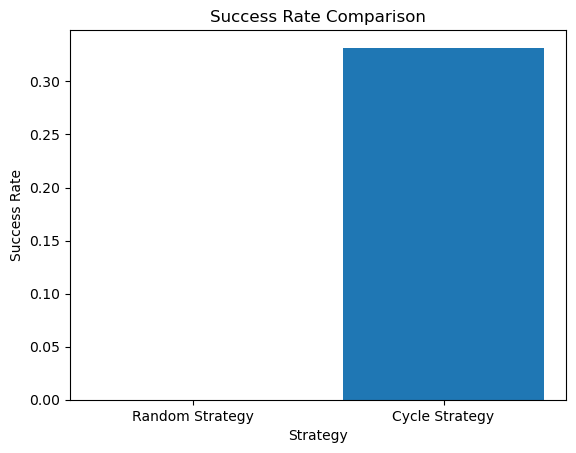

In [4]:
import numpy
import matplotlib.pyplot as plt

class PrisonerProblem:
    def __init__(self, N=100, K=50, T=10000):
        self.N = N  #囚犯数量
        self.K = K  #每人尝试次数
        self.T = T  #模拟轮次

    #随机搜索
    def random_strategy(self):
        #成功次数
        success_count = 0
        for _ in range(self.T):
            #随机排列盒子编号
            boxes = numpy.random.permutation(self.N)  
            success = True
            for i in range(self.N):
                #记录访问过的盒子
                visited = set()
                found = False
                while len(visited) < self.K:
                    #随机找一个盒子
                    index = numpy.random.randint(0, self.N)
                    if index not in visited:
                        visited.add(index)
                        #找到了
                        if boxes[index] == i:
                            found = True
                            break
                #只要有一个没找到，那就直接寄了
                if not found:
                    success = False
                    break
            #成功次数加一
            if success:
                success_count += 1
        #return成功率
        return success_count / self.T

    #循环策略
    def cycle_strategy(self):
        #成功次数
        success_count = 0
        for _ in range(self.T):
            #随机排列盒子编号
            boxes = numpy.random.permutation(self.N)
            success = True
            for i in range(self.N):
                #从自己的编号i的盒子开始找
                current_box = i
                found = False
                step = 0
                while step < self.K:
                    #找到了
                    if boxes[current_box] == i:
                        found = True
                        break
                    #没找到，要打开的盒子是当前打开盒子里编号对应的盒子
                    current_box = boxes[current_box]
                    step += 1
                #只要有一个没找到，那就直接寄了
                if not found:
                    success = False
                    break
            #成功次数加一
            if success:
                success_count += 1
        #return成功率
        return success_count / self.T

#参数设置
N = 20  #囚犯数量
K = 10   #每人尝试次数
T = 1000000  #模拟轮次

problem = PrisonerProblem(N, K, T)
random_rate = problem.random_strategy()
cycle_rate = problem.cycle_strategy()
print(f"随机搜索策略的成功率：{random_rate}")
print(f"循环策略的成功率：{cycle_rate}")
plt.bar(['Random Strategy', 'Cycle Strategy'], [random_rate, cycle_rate])
plt.title('Success Rate Comparison')
plt.xlabel('Strategy')
plt.ylabel('Success Rate')
plt.show()
